Data Science Fundamentals: Julia |
[Table of Contents](../index.ipynb)
- - - 
<!--NAVIGATION-->
Module 17. [Overview](./00_julia_overview.ipynb) | [Getting Started](./01_julia_started.ipynb) | **[Commands](./02_julia_commands.ipynb)** | [Package: Gadfly](./03_julia_gadfly.ipynb)

Hello World
---

In [1]:
println("hello world")

hello world


# Commands

Our approach is aimed at those who already have at least some knowledge of programming — perhaps experience with Python, MATLAB, R, C or similar

In particular, we assume you have some familiarity with fundamental programming concepts such as

- variables
- loops
- conditionals (if/else)

[Simple Functions](https://juliabyexample.helpmanual.io/)
---

In [2]:
# function to calculate the volume of a sphere
function sphere_vol(r)
    # julia allows Unicode names (in UTF-8 encoding)
    # so either "pi" or the symbol π can be used
    return 4/3*pi*r^3
end

sphere_vol (generic function with 1 method)

In [3]:
vol = sphere_vol(3)
# @printf allows number formatting but does not automatically append the \n to statements, see below
using Printf
@printf "volume = %0.3f\n" vol 

volume = 113.097


In [4]:
# functions can also be defined more succinctly
quadratic(a, sqr_term, b) = (-b + sqr_term) / 2a

# calculates x for 0 = a*x^2+b*x+c, arguments types can be defined in function definitions
function quadratic2(a::Float64, b::Float64, c::Float64)
    # unlike other languages 2a is equivalent to 2*a
    # a^2 is used instead of a**2 or pow(a,2)
    sqr_term = sqrt(b^2-4a*c)
    r1 = quadratic(a, sqr_term, b)
    r2 = quadratic(a, -sqr_term, b)
    # multiple values can be returned from a function using tuples
    # if the return keyword is omitted, the last term is returned
    r1, r2
end

quadratic2 (generic function with 1 method)

In [5]:
quad1, quad2 = quadratic2(2.0, -2.0, -12.0)
println("result 1: ", quad1)

result 1: 3.0


In [6]:
println("result 2: ", quad2)

result 2: -2.0


String Basics 
---

In [18]:
# strings are defined with double quotes
# like variables, strings can contain any unicode character
s1 = "The quick brown fox jumps over the lazy dog α,β,γ"
println(s1)

The quick brown fox jumps over the lazy dog α,β,γ


In [14]:
# chars are defined with single quotes
c1 = 'a'
println(c1)

a


In [15]:
# the ascii value of a char can be found with Int():
println(c1, " ascii value = ", Int(c1))

a ascii value = 97


In [16]:
println("Int('α') == ", Int('α'))

Int('α') == 945


In [19]:
# strings can be converted to upper case or lower case:
s1_caps = uppercase(s1)
s1_lower = lowercase(s1)
println(s1_caps, "\n", s1_lower)

# sub strings can be indexed like arrays:
# (show prints the raw value)
show(s1[11]); println()


# or sub strings can be created:
show(s1[1:10]); println()


# end is used for the end of the array or string
show(s1[end-10:end]); println()


# julia allows string Interpolation:
a = "welcome"
b = "julia"
println("$a to $b.")


# this can extend to evaluate statements:
println("1 + 2 = $(1 + 2)")


# strings can also be concatenated using the * operator
# using * instead of + isn't intuitive when you start with Julia,
# however people think it makes more sense
s2 = "this" * " and" * " that"
println(s2)


# as well as the string function
s3 = string("this", " and", " that")
println(s3)
#> this and that


THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG Α,Β,Γ
the quick brown fox jumps over the lazy dog α,β,γ
'b'
"The quick "
"dog α,β,γ"
welcome to julia.
1 + 2 = 3
this and that
this and that


Intro to Plots in Julia
---

Data visualization has a complicated history. Plotting software makes trade-offs between features and simplicity, speed and beauty, and a static and dynamic interface. Some packages make a display and never change it, while others make updates in real-time.

Plots is a visualization interface and toolset. It sits above other backends, like GR, PyPlot, PGFPlotsX, or Plotly, connecting commands with implementation. If one backend does not support your desired features or make the right trade-offs, you can just switch to another backend with one command. No need to change your code. No need to learn a new syntax. Plots might be the last plotting package you ever learn.

The goals with the package are:

- Powerful. Do more with less. Complex visualizations become easy.
- Intuitive. Start generating plots without reading volumes of documentation. Commands should "just work."
- Concise. Less code means fewer mistakes and more efficient development and analysis.
- Flexible. Produce your favorite plots from your favorite package, only quicker and simpler.
- Consistent. Don't commit to one graphics package. Use the same code and access the strengths of all backends.
- Lightweight. Very few dependencies, since backends are loaded and initialized dynamically.
- Smart. It's not quite AGI, but Plots should figure out what you want it to do... not just what you tell it.
- Use the preprocessing pipeline in Plots to describe your visualization completely before it calls the backend code. This preprocessing maintains modularity and allows for efficient separation of front end code, algorithms, and backend graphics.

In [20]:
import Pkg;
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General`
    Updating registry at `~/.julia/registries/JuliaComputingRegistry`
   Resolving package versions...
   Installed libpng_jll ─────── v1.6.38+0
   Installed StatsAPI ───────── v1.0.0
   Installed Libtiff_jll ────── v4.3.0+0
   Installed StructArrays ───── v0.6.0
   Installed LaTeXStrings ───── v1.2.1
   Installed GeometryBasics ─── v0.4.1
   Installed Scratch ────────── v1.1.0
   Installed RecipesPipeline ── v0.3.4
   Installed Requires ───────── v1.1.3
   Installed Plots ──────────── v1.20.1
   Installed LZO_jll ────────── v2.10.1+0
   Installed Zstd_jll ───────── v1.5.0+0
   Installed PCRE_jll ───────── v8.44.0+0
   Installed XSLT_jll ───────── v1.1.34+0
   Installed GR_jll ─────────── v0.58.1+0
   Installed LibVPX_jll ─────── v1.10.0+0
   Installed Libmount_jll ───── v2.35.0+0
   Installed ColorTypes ─────── v0.11.0
   Installed Glib_jll ───────── v2.68.3+0
   Installed StaticArrays ───── v1.2.12
   Installed Qt5Base_jll ──────

    Building GR → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/182da592436e287758ded5be6e32c406de3a2e47/build.log`
Precompiling project...
  ✓ Adapt
  ✓ Requires
  ✓ Grisu
  ✓ StatsAPI
  ✓ Libgpg_error_jll
  ✓ Opus_jll
  ✓ Libffi_jll
  ✓ LAME_jll
  ✓ Xorg_libXdmcp_jll
  ✓ IniFile
  ✓ EarCut_jll
  ✓ CompilerSupportLibraries_jll
  ✓ LaTeXStrings
  ✓ FixedPointNumbers
  ✓ Scratch
  ✓ MacroTools
  ✓ LibVPX_jll
  ✓ libfdk_aac_jll
  ✓ NaNMath
  ✓ RecipesBase
  ✓ libpng_jll
  ✓ LZO_jll
  ✓ Zstd_jll
  ✓ PCRE_jll
  ✓ IterTools
  ✓ Libuuid_jll
  ✓ Measures
  ✓ Xorg_libXau_jll
  ✓ JpegTurbo_jll
  ✓ Libiconv_jll
  ✓ URIs
  ✓ Xorg_libpthread_stubs_jll
  ✓ FriBidi_jll
  ✓ Pixman_jll
  ✓ Xorg_xtrans_jll
  ✓ Expat_jll
  ✓ Showoff
  ✓ Libmount_jll
  ✓ Bzip2_jll
  ✓ Ogg_jll
  ✓ x265_jll
  ✓ OpenSSL_jll
  ✓ x264_jll
  ✓ Libgcrypt_jll
  ✓ Latexify
  ✓ FreeType2_jll
  ✓ StatsBase
  ✓ XML2_jll
  ✓ Libtiff_jll
  ✓ libvorbis_jll
  ✓ HTTP
  ✓ Wayland_jll
  ✓ libass_jll
  ✓ Fontconfig_jll
  ✓ XS

[PyPlot](https://docs.juliaplots.org/latest/generated/pyplot/)
---

In [21]:
using Plots
Plots.PyPlotBackend()

Plots.PyPlotBackend()

#### Simple is Beautiful

┌ Info: Saved animation to 
│   fn = /Users/gsjackson/Documents/Cloud/Repositories/tts-ds-fundamentals-course/datascience/julia/17_mod_julia/tmp.gif
└ @ Plots /Users/gsjackson/.julia/packages/Plots/HcxwM/src/animation.jl:114


Plots.AnimatedGif("/Users/gsjackson/Documents/Cloud/Repositories/tts-ds-fundamentals-course/datascience/julia/17_mod_julia/tmp.gif")
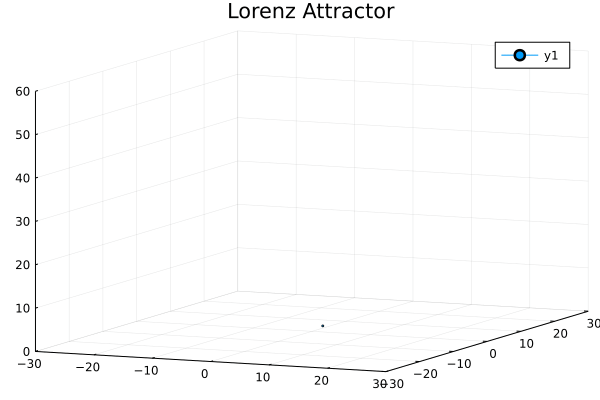

In [22]:
using Plots
# define the Lorenz attractor
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x);         l.x += l.dt * dx
    dy = l.x * (l.ρ - l.z) - l.y;   l.y += l.dt * dy
    dz = l.x * l.y - l.β * l.z;     l.z += l.dt * dz
end

attractor = Lorenz()


# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    marker = 2,
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10

#### Make Some Waves

┌ Info: Saved animation to 
│   fn = /Users/gsjackson/Documents/Repositories/QLX-I/datascience/julia/17_mod_julia/tmp.gif
└ @ Plots /Users/gsjackson/.julia/packages/Plots/M1wcx/src/animation.jl:104


Plots.AnimatedGif("/Users/gsjackson/Documents/Repositories/QLX-I/datascience/julia/17_mod_julia/tmp.gif")
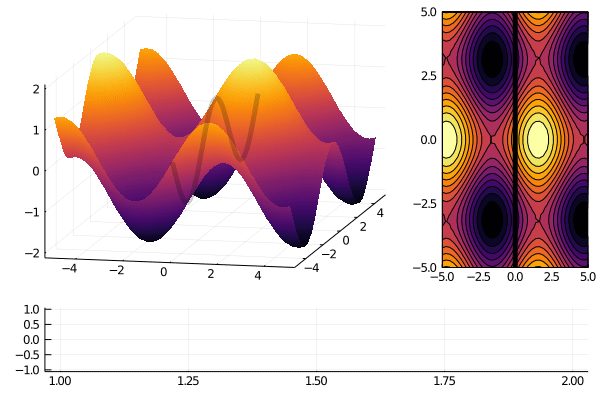

In [9]:
using Plots
default(legend = false)
x = y = range(-5, 5, length = 40)
zs = zeros(0, 40)
n = 100

@gif for i in range(0, stop = 2π, length = n)
    f(x, y) = sin(x + 10sin(i)) + cos(y)

    # create a plot with 3 subplots and a custom layout
    l = @layout [a{0.7w} b; c{0.2h}]
    p = plot(x, y, f, st = [:surface, :contourf], layout = l)

    # induce a slight oscillating camera angle sweep, in degrees (azimuth, altitude)
    plot!(p[1], camera = (10 * (1 + cos(i)), 40))

    # add a tracking line
    fixed_x = zeros(40)
    z = map(f, fixed_x, y)
    plot!(p[1], fixed_x, y, z, line = (:black, 5, 0.2))
    vline!(p[2], [0], line = (:black, 5))

    # add to and show the tracked values over time
    global zs = vcat(zs, z')
    plot!(p[3], zs, alpha = 0.2, palette = cgrad(:blues).colors)
end

#### Iris Dataset

In [11]:
import Pkg
Pkg.add("RDatasets")

  Resolving package versions...
  Installed ExprTools ─ v0.1.2
  Installed FileIO ──── v1.4.3
  Installed TimeZones ─ v1.3.2
  Installed RDatasets ─ v0.6.10
Updating `~/.julia/environments/v1.5/Project.toml`
  [ce6b1742] + RDatasets v0.6.10
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [944b1d66] + CodecZlib v0.7.0
  [e2ba6199] + ExprTools v0.1.2
  [8f5d6c58] + EzXML v1.1.0
  [5789e2e9] + FileIO v1.4.3
  [94ce4f54] + Libiconv_jll v1.16.0+6
  [78c3b35d] + Mocking v0.7.1
  [df47a6cb] + RData v0.7.2
  [ce6b1742] + RDatasets v0.6.10
  [f269a46b] + TimeZones v1.3.2
  [3bb67fe8] + TranscodingStreams v0.9.5
  [02c8fc9c] + XML2_jll v2.9.10+2
   Building TimeZones → `~/.julia/packages/TimeZones/v0mfN/deps/build.log`


In [13]:
import Pkg
Pkg.add("StatsPlots")

  Resolving package versions...
  Installed Widgets ─────────── v0.6.2
  Installed OpenBLAS_jll ────── v0.3.10+0
  Installed TableOperations ─── v0.2.1
  Installed MultivariateStats ─ v0.7.0
  Installed StatsPlots ──────── v0.14.13
  Installed Observables ─────── v0.3.1
  Installed NearestNeighbors ── v0.4.4
  Installed Clustering ──────── v0.14.1
######################################################################### 100.0%
######################################################################### 100.0%
Updating `~/.julia/environments/v1.5/Project.toml`
  [f3b207a7] + StatsPlots v0.14.13
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [7d9fca2a] + Arpack v0.4.0
  [68821587] + Arpack_jll v3.5.0+3
  [aaaa29a8] + Clustering v0.14.1
  [6f286f6a] + MultivariateStats v0.7.0
  [b8a86587] + NearestNeighbors v0.4.4
  [510215fc] + Observables v0.3.1
  [4536629a] + OpenBLAS_jll v0.3.10+0
  [f3b207a7] + StatsPlots v0.14.13
  [ab02a1b2] + TableOperations v0.2.1
  [cc8bc4a8] + Widgets v0.6.

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278


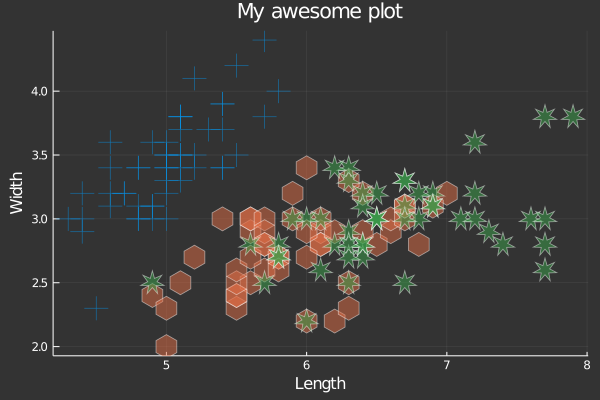

In [14]:
# load a dataset
using RDatasets
iris = dataset("datasets", "iris");

# load the StatsPlots recipes (for DataFrames) available via:
using StatsPlots

# Scatter plot with some custom settings
@df iris scatter(
    :SepalLength,
    :SepalWidth,
    group = :Species,
    title = "My awesome plot",
    xlabel = "Length",
    ylabel = "Width",
    m = (0.5, [:cross :hex :star7], 12),
    bg = RGB(0.2, 0.2, 0.2)
)

### Lines

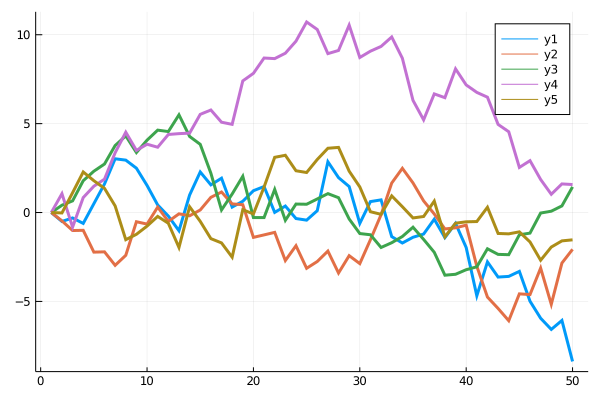

In [4]:
plot(Plots.fakedata(50, 5), w = 3)

### Parametric Plots

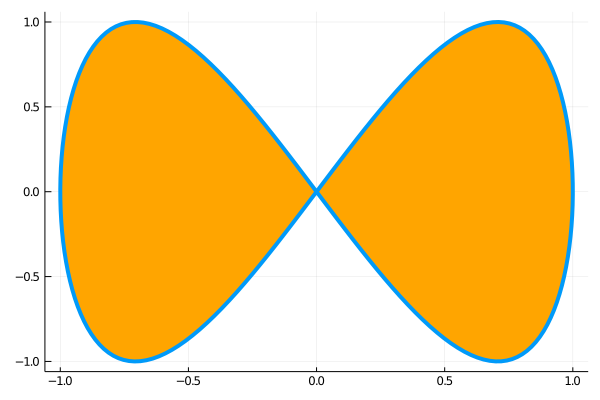

In [5]:
plot(sin, (x->begin
            sin(2x)
        end), 0, 2π, line = 4, leg = false, fill = (0, :orange))

### Colors
Access predefined palettes (or build your own with the colorscheme method). Line/marker colors are auto-generated from the plot's palette, unless overridden. Set the z argument to turn on series gradients.

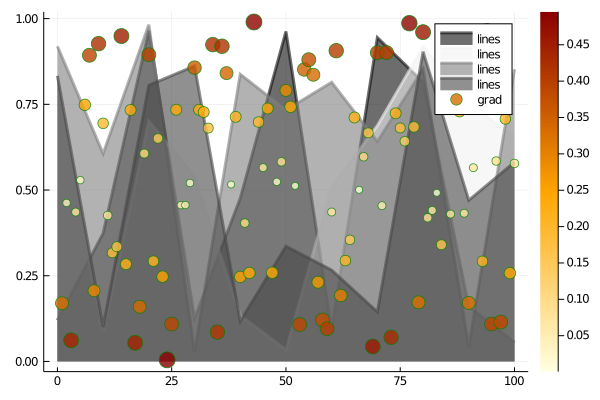

In [6]:
y = rand(100)
plot(0:10:100, rand(11, 4), lab = "lines", w = 3, palette = cgrad(:grays), fill = 0, α = 0.6)
scatter!(y, zcolor = abs.(y .- 0.5), m = (:heat, 0.8, Plots.stroke(1, :green)), ms = 10 * abs.(y .- 0.5) .+ 4, lab = "grad")

### Global
Change the guides/background/limits/ticks. Convenience args xaxis and yaxis allow you to pass a tuple or value which will be mapped to the relevant args automatically. The xaxis below will be replaced with xlabel and xlims args automatically during the preprocessing step. You can also use shorthand functions: ```title!, xaxis!, yaxis!, xlabel!, ylabel!, xlims!, ylims!, xticks!, yticks!```

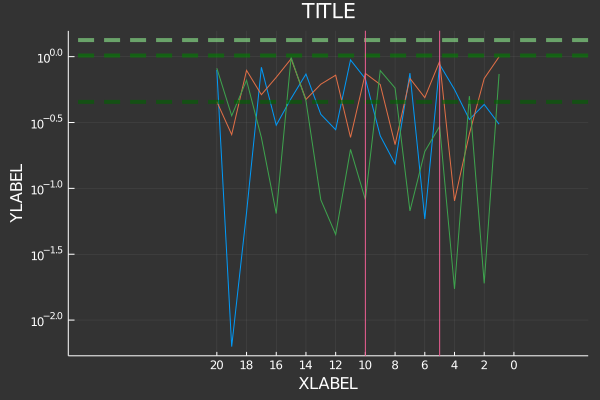

In [7]:
using Statistics
y = rand(20, 3)
plot(y, xaxis = ("XLABEL", (-5, 30), 0:2:20, :flip), background_color = RGB(0.2, 0.2, 0.2), leg = false)
hline!(mean(y, dims = 1) + rand(1, 3), line = (4, :dash, 0.6, [:lightgreen :green :darkgreen]))
vline!([5, 10])
title!("TITLE")
yaxis!("YLABEL", :log10)

Arrays
---

The function call epsilon_values = randn(ts_length) creates one of the most fundamental Julia data types: an array

In [23]:
function printsum(a)
    # summary generates a summary of an object
    println(summary(a), ": ", repr(a))
end

# arrays can be initialised directly:
a1 = [1,2,3]
printsum(a1)

# or initialised empty:
a2 = []
printsum(a2)

# since this array has no type, functions like push! (see below) don't work
# instead arrays can be initialised with a type:
a3 = Int64[]
printsum(a3)

# ranges are different from arrays:
a4 = 1:20
printsum(a4)

# however they can be used to create arrays thus:
a4 = collect(1:20)
printsum(a4)

# arrays can also be generated from comprehensions:
a5 = [2^i for i = 1:10]
printsum(a5)

# arrays can be any type, so arrays of arrays can be created:
a6 = (Array{Int64, 1})[]
printsum(a6)

# (note this is a "jagged array" (i.e., an array of arrays), not a multidimensional array,
# these are not covered here)

# Julia provided a number of "Dequeue" functions, the most common
# for appending to the end of arrays is push!
# ! at the end of a function name indicates that the first argument is updated.

push!(a1, 4)
printsum(a1)

# push!(a2, 1) would cause error:

push!(a3, 1)
printsum(a3) #> 1-element Array{Int64,1}: [1]

push!(a6, [1,2,3])
printsum(a6)

# using repeat() to create arrays
# you must use the keywords "inner" and "outer"
# all arguments must be arrays (not ranges)

a7 = repeat(a1,inner=[2],outer=[1])
printsum(a7)

a8 = repeat(collect(4:-1:1),inner=[1],outer=[2])
printsum(a8)

3-element Vector{Int64}: [1, 2, 3]
0-element Vector{Any}: Any[]
0-element Vector{Int64}: Int64[]
20-element UnitRange{Int64}: 1:20
20-element Vector{Int64}: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
10-element Vector{Int64}: [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
0-element Vector{Vector{Int64}}: Vector{Int64}[]
4-element Vector{Int64}: [1, 2, 3, 4]
1-element Vector{Int64}: [1]
1-element Vector{Vector{Int64}}: [[1, 2, 3]]
8-element Vector{Int64}: [1, 1, 2, 2, 3, 3, 4, 4]
8-element Vector{Int64}: [4, 3, 2, 1, 4, 3, 2, 1]


The information from typeof() tells us that epsilon_values is an array of 64 bit floating point values, of dimension 1

Julia arrays are quite flexible — they can store heterogeneous data for example

In [24]:
x = [10, "foo", false]

3-element Vector{Any}:
    10
      "foo"
 false

Notice now that the data type is recorded as Any, since the array contains mixed data

The first element of x is an integer

In [26]:
typeof(x[3])

Bool

The second is a string

In [13]:
typeof(x[2])

String

The third is the boolean value false

In [14]:
typeof(x[3])

Bool

Notice from the above that

- array indices start at 1 (unlike Python, where arrays are zero-based)
- array elements are referenced using square brackets (unlike MATLAB and Fortran)
- Julia contains many functions for acting on arrays — we’ll review them later

For now here’s several examples, applied to the same list x = [10, "foo", false]

The first example just returns the length of the list

The second, pop!(), pops the last element off the list and returns it

In doing so it changes the list (by dropping the last element)

Because of this we call pop! a mutating method

It’s conventional in Julia that mutating methods end in ! to remind the user that the function has other effects beyond just returning a value

The function push!() is similar, expect that it appends its second argument to the array

For Loops
---

Although there’s no need in terms of what we wanted to achieve with our program, for the sake of learning syntax let’s rewrite our program to use a for loop

In [27]:
# Julia program to illustrate 
# the use of For loop 

print("List Iteration\n") 
l = ["geeks", "for", "geeks"] 
for i in l 
	println(i) 
end 

# Iterating over a tuple (immutable) 
print("\nTuple Iteration\n") 
t = ("geeks", "for", "geeks") 
for i in t 
	println(i) 
end 

# Iterating over a String 
print("\nString Iteration\n")	 
s = "Geeks"
for i in s 
	println(i) 
end 

List Iteration
geeks
for
geeks

Tuple Iteration
geeks
for
geeks

String Iteration
G
e
e
k
s


In [28]:
# Julia program to illustrate 
# the use of Nested For-Loops 

# Outer For-loop 
for i in 1:5

	# Inner For-loop 
	for j in 1:i 
		
		# Print statement 
		print(i, " ") 
	end 
	println() 
end 


1 
2 2 
3 3 3 
4 4 4 4 
5 5 5 5 5 


Here we first declared ```epsilon_values``` to be an empty array for storing 64 bit floating point numbers

The for loop then populates this array by successive calls to randn()

Called without an argument, ```randn()``` returns a single float

Like all code blocks in Julia, the end of the for loop code block (which is just one line here) is indicated by the keyword ```end```

The word ```in``` from the for loop can be replaced by symbol ```=```

The expression ```1:ts_length``` creates an iterator that is looped over — in this case the integers from 1 to ts_length

Iterators are memory efficient because the elements are generated on the fly rather than stored in memory

In Julia you can also loop directly over arrays themselves, like so

In [31]:
words = ["foo", "bar", "gary" ]
for word in words
    println("Hello $word")
end

Hello foo
Hello bar
Hello gary


User-Defined Functions
---

For the sake of the exercise, let’s now go back to the for loop but restructure our program so that generation of random variables takes place within a user-defined function

In [33]:
# Julia program to illustrate 
# the use of 'function' keyword 

# Defining a function 
function nothing() 
	println("this is a function") 
end 

# Function call 
nothing() 

this is a function


Here

- function is a Julia keyword that indicates the start of a function definition
- func is an arbitrary name for the function

Create a User-Defined Function to accept arguments. 

In [34]:
# Defining a function with arguments 
function add_fn(x, y) 
	println(x + y) 
end 

# Calling defined function 
add_fn(10, 8) 

18


[Dataframes](https://juliadata.github.io/DataFrames.jl/stable/)
---

In [37]:
using DataFrames
showln(x) = (show(x); println())
# TODO: needs more links to docs.

# A DataFrame is an in-memory database
df = DataFrame(A = [1, 2], B = [ℯ, a], C = ["xx", "xy"])
showln(df)

# The columns of a DataFrame can be indexed using numbers or names
showln(df[!, 1])

showln(df[!, :A])

showln(df[!, 2])

showln(df[!, :B])

showln(df[!, 3])

showln(df[!, :C])


# The rows of a DataFrame can be indexed only by using numbers
showln(df[1, :])

showln(df[1:2, :])

2×3 DataFrame
 Row │ A      B        C      
     │ Int64  Any      String 
─────┼────────────────────────
   1 │     1  ℯ        xx
   2 │     2  welcome  xy
[1, 2]
[1, 2]
Any[ℯ, "welcome"]
Any[ℯ, "welcome"]
["xx", "xy"]
["xx", "xy"]
DataFrameRow
 Row │ A      B    C      
     │ Int64  Any  String 
─────┼────────────────────
   1 │     1  ℯ    xx
2×3 DataFrame
 Row │ A      B        C      
     │ Int64  Any      String 
─────┼────────────────────────
   1 │     1  ℯ        xx
   2 │     2  welcome  xy


In [38]:
import Pkg; Pkg.add("CSV")

   Resolving package versions...
   Installed SentinelArrays ─ v1.3.6
   Installed Parsers ──────── v1.1.2
   Installed CSV ──────────── v0.8.5
    Updating `~/.julia/environments/v1.6/Project.toml`
  [336ed68f] + CSV v0.8.5
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [336ed68f] + CSV v0.8.5
  [69de0a69] ↓ Parsers v2.0.2 ⇒ v1.1.2
  [91c51154] + SentinelArrays v1.3.6
Precompiling project...
  ✓ SentinelArrays
  ✓ Parsers
  ✓ JSON
  ✓ Conda
  ✓ GR
  ✓ IJulia
  ✓ CSV
  ✓ Plots
  8 dependencies successfully precompiled in 65 seconds (122 already precompiled)
  6 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


Importing Dataframes
---

In [18]:
using CSV

# DataFrames can be loaded from CSV files using CSV.read()
iris = CSV.read("data/iris_csv.csv")

150×5 DataFrame
│ Row │ sepallength │ sepalwidth │ petallength │ petalwidth │ class          │
│     │ Float64     │ Float64    │ Float64     │ Float64    │ String         │
├─────┼─────────────┼────────────┼─────────────┼────────────┼────────────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ Iris-setosa    │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ Iris-setosa    │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ Iris-setosa    │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ Iris-setosa    │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ Iris-setosa    │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ Iris-setosa    │
│ 7   │ 4.6         │ 3.4        │ 1.4         │ 0.3        │ Iris-setosa    │
│ 8   │ 5.0         │ 3.4        │ 1.5         │ 0.2        │ Iris-setosa    │
│ 9   │ 4.4         │ 2.9        │ 1.4         │ 0.2        │ Iris-setosa    │
│ 10  │ 4.9         │ 3.1        │ 1.5         │ 0.1        │ Iris-setosa    │
⋮
│ 140 │ 6.9         │ 3.1        │ 5.4         │ 2.1        │ Iris-virginica │
│ 141 │ 6.7         │ 3.1        │ 5.6         │ 2.4        │ Iris-virginica │
│ 142 │ 6.9         │ 3.1        │ 5.1         │ 2.3        │ Iris-virginica │
│ 143 │ 5.8         │ 2.7        │ 5.1         │ 1.9        │ Iris-virginica │
│ 144 │ 6.8         │ 3.2        │ 5.9         │ 2.3        │ Iris-virginica │
│ 145 │ 6.7         │ 3.3        │ 5.7         │ 2.5        │ Iris-virginica │
│ 146 │ 6.7         │ 3.0        │ 5.2         │ 2.3        │ Iris-virginica │
│ 147 │ 6.3         │ 2.5        │ 5.0         │ 1.9        │ Iris-virginica │
│ 148 │ 6.5         │ 3.0        │ 5.2         │ 2.0        │ Iris-virginica │
│ 149 │ 6.2         │ 3.4        │ 5.4         │ 2.3        │ Iris-virginica │
│ 150 │ 5.9         │ 3.0        │ 5.1         │ 1.8        │ Iris-virginica │

In [43]:
import Pkg; Pkg.add("RData")

  Resolving package versions...
  Installed Libiconv_jll ─────── v1.16.0+5
  Installed Mocking ──────────── v0.7.1
  Installed ExprTools ────────── v0.1.1
  Installed FileIO ───────────── v1.3.0
  Installed RData ────────────── v0.7.2
  Installed EzXML ────────────── v1.1.0
  Installed TranscodingStreams ─ v0.9.5
  Installed TimeZones ────────── v1.2.0
  Installed Zlib_jll ─────────── v1.2.11+14
  Installed CodecZlib ────────── v0.7.0
  Installed RecipesBase ──────── v1.0.1
  Installed XML2_jll ─────────── v2.9.10+1
######################################################################### 100.0%##O=#  #                                                                       
######################################################################### 100.0%##O#- #                                                                        
######################################################################### 100.0%##O#- #                                                                       

In [45]:
import Pkg; Pkg.add("RDatasets")

  Resolving package versions...
  Installed RDatasets ─ v0.6.9
   Updating `~/.julia/environments/v1.4/Project.toml`
  [ce6b1742] + RDatasets v0.6.9
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [ce6b1742] + RDatasets v0.6.9


In [20]:
import Pkg
Pkg.add("RData")

  Resolving package versions...
Updating `~/.julia/environments/v1.5/Project.toml`
  [df47a6cb] + RData v0.7.2
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [21]:
# the iris dataset (and plenty of others) is also available from
using RData, RDatasets
iris2 = dataset("datasets","iris")

150×5 DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species   │
│     │ Float64     │ Float64    │ Float64     │ Float64    │ Cat…      │
├─────┼─────────────┼────────────┼─────────────┼────────────┼───────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ setosa    │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ setosa    │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ setosa    │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ setosa    │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ setosa    │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ setosa    │
│ 7   │ 4.6         │ 3.4        │ 1.4         │ 0.3        │ setosa    │
│ 8   │ 5.0         │ 3.4        │ 1.5         │ 0.2        │ setosa    │
│ 9   │ 4.4         │ 2.9        │ 1.4         │ 0.2        │ setosa    │
│ 10  │ 4.9         │ 3.1        │ 1.5         │ 0.1        │ setosa    │
⋮
│ 140 │ 6.9         │ 3.1        │ 5.4         │ 2.1        │ virginica │
│ 141 │ 6.7         │ 3.1        │ 5.6         │ 2.4        │ virginica │
│ 142 │ 6.9         │ 3.1        │ 5.1         │ 2.3        │ virginica │
│ 143 │ 5.8         │ 2.7        │ 5.1         │ 1.9        │ virginica │
│ 144 │ 6.8         │ 3.2        │ 5.9         │ 2.3        │ virginica │
│ 145 │ 6.7         │ 3.3        │ 5.7         │ 2.5        │ virginica │
│ 146 │ 6.7         │ 3.0        │ 5.2         │ 2.3        │ virginica │
│ 147 │ 6.3         │ 2.5        │ 5.0         │ 1.9        │ virginica │
│ 148 │ 6.5         │ 3.0        │ 5.2         │ 2.0        │ virginica │
│ 149 │ 6.2         │ 3.4        │ 5.4         │ 2.3        │ virginica │
│ 150 │ 5.9         │ 3.0        │ 5.1         │ 1.8        │ virginica │

Showing Dataframes
---

In [24]:
# Subset the DataFrame to only include rows for one species
showln(iris2[iris2[!, :Species] .== "setosa", :])

50×5 DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species │
│     │ Float64     │ Float64    │ Float64     │ Float64    │ Cat…    │
├─────┼─────────────┼────────────┼─────────────┼────────────┼─────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ setosa  │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ setosa  │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ setosa  │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ setosa  │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ setosa  │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ setosa  │
│ 7   │ 4.6         │ 3.4        │ 1.4         │ 0.3        │ setosa  │
│ 8   │ 5.0         │ 3.4        │ 1.5         │ 0.2        │ setosa  │
│ 9   │ 4.4         │ 2.9        │ 1.4         │ 0.2        │ setosa  │
│ 10  │ 4.9         │ 3.1        │ 1.5         │ 0.1        │ setosa  │
⋮
│ 40  │ 5.1         │ 3.4        │ 1.5         

In [25]:
# Count the number of rows for each species
showln(by(iris2, :Species, df -> size(df, 1)))

# Discretize entire columns at a time
iris2[!, :SepalLength] = round.(Integer, iris2[!, :SepalLength])
iris2[!, :SepalWidth] = round.(Integer, iris2[!, :SepalWidth])


# Tabulate data according to discretized columns to see "clusters"
tabulated = by(
    iris2,
    [:Species, :SepalLength, :SepalWidth],
    df -> size(df, 1)
)
showln(tabulated)


# you can setup a grouped dataframe like this
gdf = groupby(iris2,[:Species, :SepalLength, :SepalWidth])

# and then iterate over it
for idf in gdf
    println(size(idf,1))
end

# Adding/Removing columns
# -----------------------

# insert!(df::DataFrame,index::Int64,item::AbstractArray{T,1},name::Symbol)
# insert random numbers at col 5:
insertcols!(iris2, 5, :randCol => rand(nrow(iris2)))

# remove it
select!(iris2, Not(:randCol))

3×2 DataFrame
│ Row │ Species    │ x1    │
│     │ Cat…       │ Int64 │
├─────┼────────────┼───────┤
│ 1   │ setosa     │ 50    │
│ 2   │ versicolor │ 50    │
│ 3   │ virginica  │ 50    │
18×4 DataFrame
│ Row │ Species    │ SepalLength │ SepalWidth │ x1    │
│     │ Cat…       │ Int64       │ Int64      │ Int64 │
├─────┼────────────┼─────────────┼────────────┼───────┤
│ 1   │ setosa     │ 5           │ 4          │ 17    │
│ 2   │ setosa     │ 5           │ 3          │ 23    │
│ 3   │ setosa     │ 4           │ 3          │ 4     │
│ 4   │ setosa     │ 6           │ 4          │ 5     │
│ 5   │ setosa     │ 4           │ 2          │ 1     │
│ 6   │ versicolor │ 7           │ 3          │ 8     │
│ 7   │ versicolor │ 6           │ 3          │ 27    │
│ 8   │ versicolor │ 6           │ 2          │ 9     │
│ 9   │ versicolor │ 5           │ 2          │ 4     │
│ 10  │ versicolor │ 5           │ 3          │ 2     │
│ 11  │ virginica  │ 6           │ 3          │ 24    │
│ 12  │ virgi

150×5 DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species   │
│     │ Int64       │ Int64      │ Float64     │ Float64    │ Cat…      │
├─────┼─────────────┼────────────┼─────────────┼────────────┼───────────┤
│ 1   │ 5           │ 4          │ 1.4         │ 0.2        │ setosa    │
│ 2   │ 5           │ 3          │ 1.4         │ 0.2        │ setosa    │
│ 3   │ 5           │ 3          │ 1.3         │ 0.2        │ setosa    │
│ 4   │ 5           │ 3          │ 1.5         │ 0.2        │ setosa    │
│ 5   │ 5           │ 4          │ 1.4         │ 0.2        │ setosa    │
│ 6   │ 5           │ 4          │ 1.7         │ 0.4        │ setosa    │
│ 7   │ 5           │ 3          │ 1.4         │ 0.3        │ setosa    │
│ 8   │ 5           │ 3          │ 1.5         │ 0.2        │ setosa    │
│ 9   │ 4           │ 3          │ 1.4         │ 0.2        │ setosa    │
│ 10  │ 5           │ 3          │ 1.5         │ 0.1        │ setosa    │
⋮
│ 140 │ 7           │ 3          │ 5.4         │ 2.1        │ virginica │
│ 141 │ 7           │ 3          │ 5.6         │ 2.4        │ virginica │
│ 142 │ 7           │ 3          │ 5.1         │ 2.3        │ virginica │
│ 143 │ 6           │ 3          │ 5.1         │ 1.9        │ virginica │
│ 144 │ 7           │ 3          │ 5.9         │ 2.3        │ virginica │
│ 145 │ 7           │ 3          │ 5.7         │ 2.5        │ virginica │
│ 146 │ 7           │ 3          │ 5.2         │ 2.3        │ virginica │
│ 147 │ 6           │ 2          │ 5.0         │ 1.9        │ virginica │
│ 148 │ 6           │ 3          │ 5.2         │ 2.0        │ virginica │
│ 149 │ 6           │ 3          │ 5.4         │ 2.3        │ virginica │
│ 150 │ 6           │ 3          │ 5.1         │ 1.8        │ virginica │

- - - 
<!--NAVIGATION-->
Module 17. [Overview](./00_julia_overview.ipynb) | [Getting Started](./01_julia_started.ipynb) | **[Commands](./02_julia_commands.ipynb)** | [Package: Gadfly](./03_julia_gadfly.ipynb)

- - -

Copyright © 2020 Qualex Consulting Services Incorporated.